**Partie 1 : Environnement de travail**
 - <a href="#C1">Librairies utilisées</a>
 - <a href="#Import">Importation des données</a>

**Partie 2 : Analyse exploratoire du jeu de données**
 - <a href="#C2">Exploration préliminaire </a>
 - <a href="#C3">Approche métier du Nutri-Score</a>


**Partie 3 : Nettoyage du jeu de données**
 - <a href="#C5">Erreurs de type</a>
 - <a href="#C6">Valeurs manquantes</a>
 - <a href="#C7">Imputation</a>
 - <a href="#C8">Détection d'outliers</a>
 
**Partie 4 : Analyse uni-variée et bi-variée**
 - <a href="#C10"> Description des distributions des variables clés</a>
 - <a href="#C11"> Mise en évidence des variables avec des distributions intéressantes</a>
  
**Partie 5 : Analyse multi-variée**
 - Analyse ACP
    - <a href="#C15">Relations observées entre les variables</a>
    - <a href="#C16">Mise en évidence des corrélations positives et négatives</a>
    - <a href="#C17">Explication de la variance capturée par les composantes principales`</a>
    - <a href="#C18">Interprétation des charges des variables sur les composantes principales</a>

 - Analyse ANOVA
    - <a href="#C20">Explication des différences significatives entre les groupes</a>
    - <a href="#C21">Importance des résultats pour lz compréhension des données</a>


**Partie 6 : Synthèse et perspectives**
 - <a href="#C25">Résumé des principales découvertes</a>


# Partie 1: Environnement de travail
### <a name="C1">Librairies utilisées</a>

In [1]:
# Version des bibliothèques utilisées (standard)
import importlib

print('\n'.join(f'{m.__name__} - {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))


# Version des bibliothèques utilisées (import non complet)
# Cela suppose que tu comptes utiliser matplotlib
print("matplotlib - ", importlib.metadata.version('matplotlib'))


matplotlib -  3.9.4


### <a name='Import'>Importation des données</a>

In [2]:
import time
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import missingno as msno
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


Nous pouvons à présent charger le jeu de données, dans un dataframe que nous nommerons ici `df`. Nous affichons ensuite les 5 premières lignes.

In [3]:
file_path = './data/fr.openfoodfacts.org.products.csv'
df = pd.read_csv(file_path, sep="\t")
df_history = pd.DataFrame(data=[["Chargement", df.shape[0], df.shape[1]]], columns=['operation', 'row', 'col'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 162)
display(df.head())

C:\Users\Samuel Judith\AppData\Local\Temp\ipykernel_16376\2669362179.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4559  http://world-fr.openfoodfacts.org/produit/0000...   
2  16087  http://world-fr.openfoodfacts.org/produit/0000...   
3  16094  http://world-fr.openfoodfacts.org/produit/0000...   
4  16100  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
3             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   
4             usda-ndb-import  1489055651  2017-03-09T10:34:11Z   

  last_modified_t last_modified_datetime                       product_name  \
0      1474103893   2016-09-17T09:18:13Z                 Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z                            Peanuts   
2      1489055731   2017-03-09T10:35:31Z             Organic Salted Nut Mix   
3      1489055653   2017-03-09T10:34:13Z                    Organic Polenta   
4      1489055651   2017-03-09T10:34:11Z  Breadshop Honey Gone Nuts Granola   

  generic_name quantity packaging packaging_tags           brands  \
0          NaN      1kg       NaN            NaN  Ferme t'y R'nao   
1          NaN      NaN       NaN            NaN   Torn & Glasser   
2          NaN      NaN       NaN            NaN        Grizzlies   
3          NaN      NaN       NaN            NaN   Bob's Red Mill   
4          NaN      NaN       NaN            NaN             Unfi   

       brands_tags categories categories_tags categories_fr origins  \
0  ferme-t-y-r-nao        NaN             NaN           NaN     NaN   
1     torn-glasser        NaN             NaN           NaN     NaN   
2        grizzlies        NaN             NaN           NaN     NaN   
3   bob-s-red-mill        NaN             NaN           NaN     NaN   
4             unfi        NaN             NaN           NaN     NaN   

  origins_tags manufacturing_places manufacturing_places_tags labels  \
0          NaN                  NaN                       NaN    NaN   
1          NaN                  NaN                       NaN    NaN   
2          NaN                  NaN                       NaN    NaN   
3          NaN                  NaN                       NaN    NaN   
4          NaN                  NaN                       NaN    NaN   

  labels_tags labels_fr emb_codes emb_codes_tags first_packaging_code_geo  \
0         NaN       NaN       NaN            NaN                      NaN   
1         NaN       NaN       NaN            NaN                      NaN   
2         NaN       NaN       NaN            NaN                      NaN   
3         NaN       NaN       NaN            NaN                      NaN   
4         NaN       NaN       NaN            NaN                      NaN   

  cities cities_tags purchase_places stores countries    countries_tags  \
0    NaN         NaN             NaN    NaN     en:FR         en:france   
1    NaN         NaN             NaN    NaN        US  en:united-states   
2    NaN         NaN             NaN    NaN        US  en:united-states   
3    NaN         NaN             NaN    NaN        US  en:united-states   
4    NaN         NaN             NaN    NaN        US  en:united-states   

  countries_fr                                   ingredients_text allergens  \
0       France                                                NaN       NaN   
1   États-Unis  Peanuts, wheat flour, sugar, rice flour, tapio...       NaN   
2   États-Unis  Organic hazelnuts, organic cashews, organic wa...       NaN   
3   États-Unis                                    Organic polenta       NaN   
4   États-Unis  Rolled oats, grape concentrate, expeller press...       NaN   

  allergens_fr traces traces_tags traces_fr     serving_size  no_nutriments  \
0   

# Partie 2: Analyse exploratoire du jeu de données
### <a name="C2">Exploration préliminaire</a>

In [4]:
df.shape

(320771, 162)

Comme on peut le voir via la commande ci-dessus, nous avons 320771 produits répertoriés, renseignés sur 162 variables différentes.

In [5]:
df.describe()

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248938.000000                248938.000000   
mean             NaN       1.936032                     0.019660   
std              NaN       2.502021                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248938.000000   
mean                         NaN                                 0.055247   
std                          NaN                                 0.269208   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  saturated-fat_100g  \
count  2.611120e+05            857.000000  243890.000000       229553.000000   
mean   1.141910e+03            585.501214      12.730314            5.129830   
std    6.447166e+03            712.809943      17.578753            8.014106   
min    0.000000e+00              0.000000       0.000000            0.000000   
25%    3.770000e+02             49.400000       0.000000            0.000000   
50%    1.100000e+03            300.000000       5.000000            1.790000   
75%    1.674000e+03            898.000000      20.000000            7.140000   
max    3.251373e+06           3830.000000     714.290000          550.000000   

       butyric-acid_100g  caproic-acid_100g  caprylic-acid_100g  \
count                0.0                0.0                 1.0   
mean                 NaN                NaN                 7.4   
std                  NaN                NaN                 NaN   
min                  NaN                NaN                 7.4   
25%                  NaN                NaN                 7.4   
50%                  NaN                NaN                 7.4   
75%                  NaN                NaN                 7.4   
max                  NaN                NaN                 7.4   

       capric-acid_100g  lauric-acid_100g  myristic-acid_100g  \
count          2.000000          4.000000                 1.0   
mean           6.040000         36.136182                18.9   
std            0.226274         24.101433                 NaN   
min            5.880000          0.044730                18.9   
25%            5.960000         34.661183                18.9   
50%            6.040000         47.600000                18.9   
75%            6.120000         49.075000                18.9   
max            6.200000         49.300000                18.9   

       palmitic-acid_100g  stearic-acid_100g  arachidic-acid_100g  \
count                 1.0                1.0            24.000000   
mean                  8.1             

*Nombre d'observations (count) :*

- Certaines colonnes ont un nombre d'observations (count) inférieur à d'autres, indiquant la présence de valeurs manquantes. Par exemple, energy_100g a 261,112 observations, tandis que no_nutriments n'en a aucune.

*Moyenne (mean) :*

- La colonne energy_100g a une moyenne de 1,141.91 kJ, ce qui est une mesure de l'énergie par 100 grammes de produit.
- La colonne sugars_100g a une moyenne de 11.84 g, indiquant la teneur moyenne en sucres.

*Écart-type (std) :*

- L'écart-type de energy_100g est de 6,447.166 kJ, ce qui montre une grande variabilité dans les valeurs d'énergie.
- Pour sugars_100g, l'écart-type est de 13.99 g, indiquant également une variabilité significative.

* Valeurs minimales et maximales (min et max) :* 

- La valeur minimale de energy_100g est 0 kJ, et la maximale est 3,251,373 kJ, ce qui montre une large gamme de valeurs.
- fat_100g : La valeur maximale est de 714.29, ce qui est bien au-delà de 100.
- saturated-fat_100g : La valeur maximale est de 550.00, ce qui est également incorrect.
- sugars_100g : La valeur maximale est de 100, ce qui est à la limite mais pourrait être suspect si elle est censée représenter un pourcentage.
- fiber_100g : La valeur maximale est de 100, ce qui est également à la limite.

*Quartiles (25%, 50%, 75%) :*

- Le premier quartile (25%) de energy_100g est 377 kJ, le deuxième quartile (50%, médiane) est 1,100 kJ, et le troisième quartile (75%) est 1,674 kJ.
- Pour sugars_100g, les quartiles sont respectivement 2.1 g, 8.1 g, et 16.15 g.


*Valeurs manquantes :*

- Certaines colonnes comme no_nutriments et ingredients_from_palm_oil ont des valeurs manquantes (NaN), ce qui peut nécessiter un traitement spécifique.


### <a name="C3">Approche métier du Nutri-Score</a>
Le calcul du Nutri-Score s'appuie sur les composants suivants.
La source utilisée est celle la [Santé publique](https://www.santepubliquefrance.fr/determinants-de-sante/nutrition-et-activite-physique/articles/nutri-score]) où un fichier excel permet d'appliquer l'algorithme de calcul du Nutri-Score.


#### Points Négatifs (à minimiser) :

Énergie (kJ) : Plus l'aliment est énergétique, plus il reçoit de points négatifs.
Sucres (g) : Les sucres simples sont à limiter.
Graisses saturées (g) : Les graisses saturées sont associées à des risques pour la santé cardiovasculaire.
Sodium (mg) : Un excès de sodium peut contribuer à l'hypertension.

#### Points Positifs (à maximiser) :

Fruits, légumes, légumineuses, noix (%): Ces aliments sont bénéfiques pour la santé.
Fibres (g) : Les fibres alimentaires sont importantes pour la digestion.
Protéines (g) : Les protéines sont essentielles pour la croissance et la réparation des tissus.

#### Les variables importantes du jeu de données seront les suivantes:
* `energy_100g`
* `sugars_100g`
* `saturated-fat_100g`
* `sodium_100g`
* `fiber_100g`
* `proteins_100g`
* `fruits-vegetables-nuts_100g`

Le calcul du Nutri-Score diffère suivant la catégorie de produit. On peut compter sur les variables:
* `pnns_groups_1`
* `pnns_groups_2`


# <a name="C2">Partie 3 : Nettoyage du jeu de données</a>

Il est à présent temps d'analyser le jeu de données. 

### Erreurs de type

Le premier reflexe est de vérifier que les variables ont bien été importées dans le bon type :

In [6]:
df.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

Certaines variables comme celles suffixées par `_datetime` peuvent être converties en date.

### Valeurs manquantes
On peut noter que beaucoup de variables ne sont pas renseignées.

<Axes: >

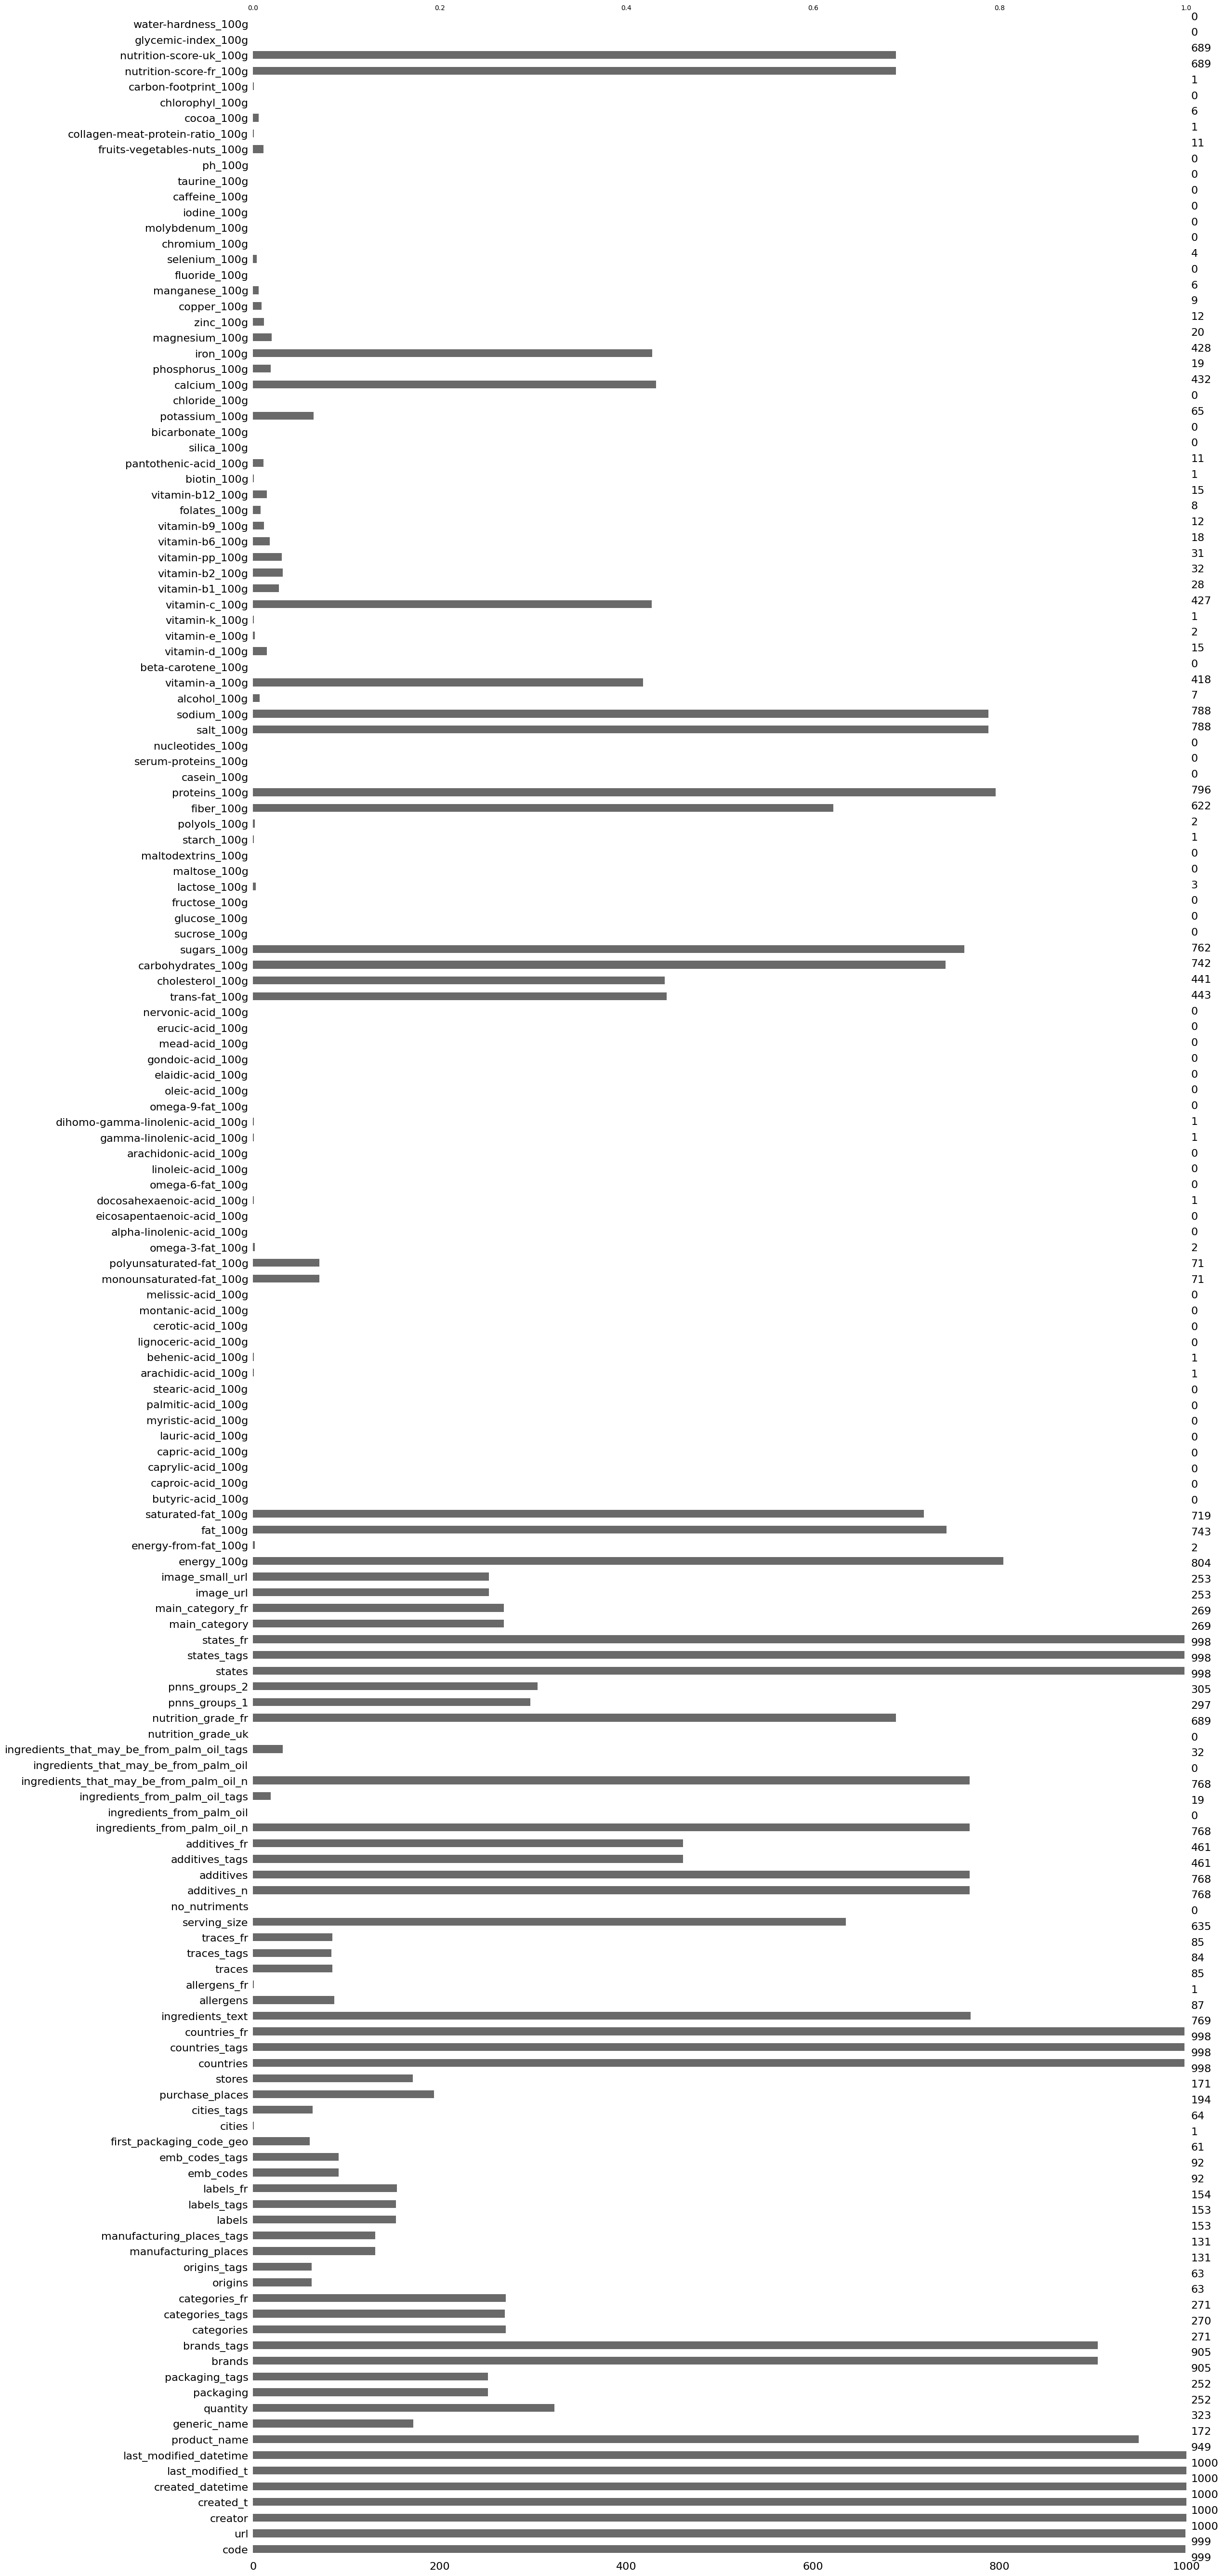

In [7]:
msno.bar(df.sample(1000))

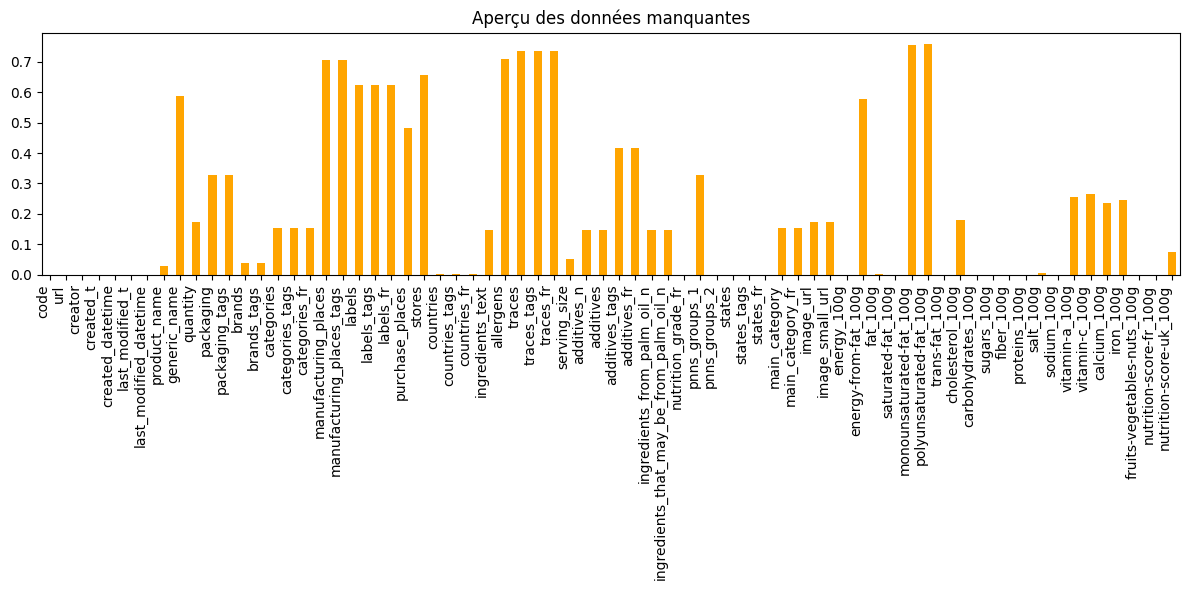

In [50]:
(df.isna().sum()/df.shape[0])

orange_color = '#FFA500'
fruit_color = "#b95a3b"
# Tracer le graphique
plt.figure(figsize=(12, 6))  # Augmenter la taille de la figure
(df.isna().sum()/df.shape[0]).plot(kind='bar', title="Aperçu des données manquantes", color=orange_color)

# Faire pivoter les labels de l'axe x
plt.xticks(rotation=90, ha='right')  # Pivoter les labels de 45 degrés

# Ajuster les marges pour éviter le chevauchement
plt.tight_layout()

# Afficher le graphique
plt.show()


Le calcul ci-dessous permet d'avoir le taux de variables vides à plus de 90% : 
* près de 62% des variables ne sont pas remplies

In [9]:
len(df.columns[(df.isna().sum()/df.shape[0])>0.9])/df.shape[1]

0.6172839506172839

Le remplissage des variables essentielles sont les suivantes:

In [10]:
columns_to_impute = ['energy_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'fiber_100g', 'proteins_100g', 
'fruits-vegetables-nuts_100g']
columns_to_display = columns_to_impute + ['salt_100g', 'pnns_groups_1', 'pnns_groups_2', "categories", "categories_tags", "categories_fr", "nutrition-score-fr_100g", "nutrition_grade_fr"]

(df[columns_to_impute].isna().sum()/df.shape[0])

energy_100g                    0.185986
sugars_100g                    0.236309
saturated-fat_100g             0.284371
sodium_100g                    0.203600
fiber_100g                     0.373743
proteins_100g                  0.189699
fruits-vegetables-nuts_100g    0.990535
dtype: float64

<Axes: title={'center': 'Taux de données manquantes'}>

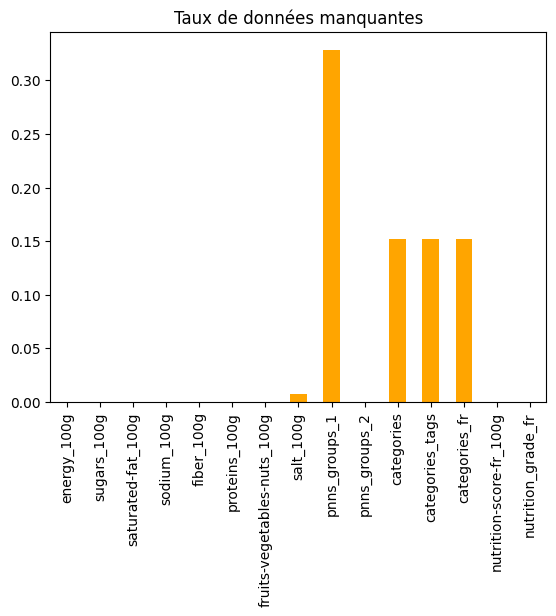

In [43]:
(df[columns_to_display].isna().sum()/df.shape[0]).plot(kind='bar', title="Taux de données manquantes", color=orange_color)

Même si la variable `fruits-vegetables-nuts_100g` est à plus de 99% de données manquantes, elle ne peut être ignorée. Il s'agira de trouver un moyen d'imputation.

### Détection de doublons

On peut noter des doublons au sens des variables pnns_groups_1 et pnns_groups_2

In [12]:
display(df["pnns_groups_1"].unique().tolist())


[nan,
 'unknown',
 'Fruits and vegetables',
 'Sugary snacks',
 'Cereals and potatoes',
 'Composite foods',
 'Fish Meat Eggs',
 'Beverages',
 'Fat and sauces',
 'fruits-and-vegetables',
 'Milk and dairy products',
 'Salty snacks',
 'sugary-snacks',
 'cereals-and-potatoes',
 'salty-snacks']

In [13]:
len(df["pnns_groups_2"].unique().tolist())

43

La variable `pnns_groups_1`est nécessaire au calcul du Nutri-score. Ici on note des doublons tels que:
* `Fruits and vegetables` et `fruits-and-vegetables`
* `Salty snacks` et `salty-snacks`
* `Sugary snacks` et `sugary-snacks`
* `Cereals and potatoes` et `cereals-and-potatoes`

Procédons à un nettoyage

In [14]:
# Convertir en minuscules
df['pnns_groups_1'] = df['pnns_groups_1'].str.lower()

# Remplacer les espaces et caractères spéciaux par des tirets
df['pnns_groups_1'] = df['pnns_groups_1'].str.replace('[^a-z0-9]+', '-', regex=True)

In [15]:
# Convertir en minuscules
df['pnns_groups_2'] = df['pnns_groups_2'].str.lower()

# Remplacer les espaces et caractères spéciaux par des tirets
df['pnns_groups_2'] = df['pnns_groups_2'].str.replace('[^a-z0-9]+', '-', regex=True)
len(df["pnns_groups_2"].unique().tolist())

38

In [16]:
display(df["pnns_groups_1"].unique().tolist())


[nan,
 'unknown',
 'fruits-and-vegetables',
 'sugary-snacks',
 'cereals-and-potatoes',
 'composite-foods',
 'fish-meat-eggs',
 'beverages',
 'fat-and-sauces',
 'milk-and-dairy-products',
 'salty-snacks']

In [17]:
# Identifier les lignes en doublon

duplicates = df[df.duplicated()]

# Afficher les lignes en doublon
print("Lignes en doublon :\n", duplicates)

# Vérifier les doublons dans la colonne 'code'
duplicated_codes = df[df.duplicated(subset='code', keep=False)]

# Afficher les doublons
print(f"Doublons trouvés ayant le même bar code : {len(duplicated_codes)}")
print(duplicated_codes)

Lignes en doublon :
 Empty DataFrame
Columns: [code, url, creator, created_t, created_datetime, last_modified_t, last_modified_datetime, product_name, generic_name, quantity, packaging, packaging_tags, brands, brands_tags, categories, categories_tags, categories_fr, origins, origins_tags, manufacturing_places, manufacturing_places_tags, labels, labels_tags, labels_fr, emb_codes, emb_codes_tags, first_packaging_code_geo, cities, cities_tags, purchase_places, stores, countries, countries_tags, countries_fr, ingredients_text, allergens, allergens_fr, traces, traces_tags, traces_fr, serving_size, no_nutriments, additives_n, additives, additives_tags, additives_fr, ingredients_from_palm_oil_n, ingredients_from_palm_oil, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_n, ingredients_that_may_be_from_palm_oil, ingredients_that_may_be_from_palm_oil_tags, nutrition_grade_uk, nutrition_grade_fr, pnns_groups_1, pnns_groups_2, states, states_tags, states_fr, main_category, ma

In [18]:
# Stratégie de nettoyage : conserver la première occurrence
df = df.drop_duplicates(subset='code', keep='first')

In [19]:
(df[columns_to_display].isna().sum()/df.shape[0])

energy_100g                    0.185911
sugars_100g                    0.236229
saturated-fat_100g             0.284286
sodium_100g                    0.203550
fiber_100g                     0.373692
proteins_100g                  0.189672
fruits-vegetables-nuts_100g    0.990534
salt_100g                      0.203404
pnns_groups_1                  0.714638
pnns_groups_2                  0.705353
categories                     0.736853
categories_tags                0.736856
categories_fr                  0.736853
nutrition-score-fr_100g        0.310294
nutrition_grade_fr             0.310294
dtype: float64

### Complétion des données

In [20]:
individus_to_be_completed = df[df['states_tags'].str.contains('to-be-completed', na=False)]

# Afficher les résultats
print(f"Liste des individus contenant le tag 'to-be-completed' dans 'states_tags' : {len(individus_to_be_completed)} soit {len(individus_to_be_completed)/df.shape[0]}\n")


Liste des individus contenant le tag 'to-be-completed' dans 'states_tags' : 293197 soit 0.9144175050992085



In [21]:
individus_to_be_completed['pnns_groups_1'].value_counts()


pnns_groups_1
unknown                    19283
sugary-snacks               9210
beverages                   7068
cereals-and-potatoes        5916
milk-and-dairy-products     4751
fruits-and-vegetables       4735
fish-meat-eggs              4130
fat-and-sauces              3913
composite-foods             3756
salty-snacks                1809
Name: count, dtype: int64


### Imputation des variables essentielles
Procédons donc par une imputation des colonnes essentielles au calcul du Nutri-Score en utilisant la médiane.

In [22]:
def impute_missing_with_median(df, column_name, group_by_column):
    """
    Impute les valeurs manquantes d'une colonne spécifique en utilisant la médiane par groupe sans utiliser transform.

    :param df: DataFrame contenant les données
    :param column_name: Nom de la colonne à imputer
    :param group_by_column: Nom de la colonne utilisée pour le regroupement
    :return: DataFrame avec les valeurs manquantes imputées
    """
    # Parcourir chaque groupe et calculer la médiane
    for group_name, group_data in df.groupby(group_by_column):
        median_value = group_data[column_name].median()
        print(f"Valeur médiane pour {column_name} / {group_name} : {median_value}")
        df.loc[group_data.index, column_name] = group_data[column_name].fillna(median_value)

    return df

# Afficher les résultats
for column_name in columns_to_impute:
    df = impute_missing_with_median(df, column_name, 'pnns_groups_1')


Valeur médiane pour energy_100g / beverages : 184.0
Valeur médiane pour energy_100g / cereals-and-potatoes : 1492.0
Valeur médiane pour energy_100g / composite-foods : 638.0
Valeur médiane pour energy_100g / fat-and-sauces : 1212.0
Valeur médiane pour energy_100g / fish-meat-eggs : 791.0
Valeur médiane pour energy_100g / fruits-and-vegetables : 219.0
Valeur médiane pour energy_100g / milk-and-dairy-products : 676.0
Valeur médiane pour energy_100g / salty-snacks : 2164.0
Valeur médiane pour energy_100g / sugary-snacks : 1924.0
Valeur médiane pour energy_100g / unknown : 1090.0
Valeur médiane pour sugars_100g / beverages : 9.1
Valeur médiane pour sugars_100g / cereals-and-potatoes : 3.1
Valeur médiane pour sugars_100g / composite-foods : 2.0
Valeur médiane pour sugars_100g / fat-and-sauces : 2.335
Valeur médiane pour sugars_100g / fish-meat-eggs : 0.6
Valeur médiane pour sugars_100g / fruits-and-vegetables : 3.6
Valeur médiane pour sugars_100g / milk-and-dairy-products : 4.7
Valeur média

In [23]:
(df[columns_to_display].isna().sum()/df.shape[0])

energy_100g                    0.112002
sugars_100g                    0.149212
saturated-fat_100g             0.196318
sodium_100g                    0.117329
fiber_100g                     0.216971
proteins_100g                  0.113686
fruits-vegetables-nuts_100g    0.714622
salt_100g                      0.203404
pnns_groups_1                  0.714638
pnns_groups_2                  0.705353
categories                     0.736853
categories_tags                0.736856
categories_fr                  0.736853
nutrition-score-fr_100g        0.310294
nutrition_grade_fr             0.310294
dtype: float64

Le calcul du nutri-score est disponible sur 

In [24]:

def calculer_nutriscore(energie, graisses_saturees, sucres, sel, fruits, fibres, proteines, categorie):
    """
    Calcule le score et la lettre du Nutri-Score en fonction du type d'aliment.
    """
    # Points négatifs
    def points_energie(kj):
        if "Beverages" ==  categorie:
            return min(10, max(0, (kj - 30) // 30))
        else:
            return min(10, max(0, (kj - 335) // 33.5))

    def points_graisses_saturees(g):
        seuils = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        return sum(g > s for s in seuils)

    def points_sucres(g):
        seuils = [4.5, 9, 13.5, 18, 22.5, 27, 31, 36, 40, 45]
        return sum(g > s for s in seuils)

    def points_sel(mg):
        seuils = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
        return sum(mg > s for s in seuils)

    # Points positifs
    def points_fruits(percent):
        return 5 if percent > 80 else 4 if percent > 60 else 3 if percent > 40 else 2 if percent > 20 else 1 if percent > 10 else 0

    def points_fibres(g):
        seuils = [0.9, 1.9, 2.8, 3.7, 4.7]
        return sum(g > s for s in seuils)

    def points_proteines(g):
        seuils = [1.6, 3.2, 4.8, 6.4, 8.0]
        return sum(g > s for s in seuils)

    # Ajustements selon la catégorie
    prendre_proteines = categorie not in ["Beverages", "Fat and sauces"]

    # Calcul des scores
    score_negatif = (points_energie(energie) + points_graisses_saturees(graisses_saturees) +
                     points_sucres(sucres) + points_sel(sel * 1000))

    score_positif = points_fruits(fruits) + points_fibres(fibres)
    if prendre_proteines:
        score_positif += points_proteines(proteines)

    score_total = score_negatif - score_positif

    # Détermination du Nutri-Score
    if categorie == "Beverages":
        if score_total <= 1:
            grade = "A"
        elif score_total <= 5:
            grade = "B"
        elif score_total <= 9:
            grade = "C"
        elif score_total <= 19:
            grade = "D"
        else:
            grade = "E"
    else:
        if score_total <= -1:
            grade = "A"
        elif score_total <= 2:
            grade = "B"
        elif score_total <= 10:
            grade = "C"
        elif score_total <= 18:
            grade = "D"
        else:
            grade = "E"

    return score_total, grade

columns_to_impute = ['energy_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'fiber_100g', 'proteins_100g', 
'fruits-vegetables-nuts_100g']


# Afficher les noms des colonnes du DataFrame
print("Noms des colonnes :", df.columns.tolist())
# Filtrer les lignes où les colonnes spécifiées ne contiennent pas de NaN
df_filtered = df.dropna(subset=['nutrition-score-fr_100g'])

# Prendre un échantillon aléatoire de 50 individus
echantillon = df_filtered.sample(n=50, random_state=1)

# Appliquer la fonction calculer_nutriscore à chaque ligne
echantillon[['nutrition-score-fr_100g_calc', 'nutrition_grade_fr_calc']] = df.apply(
    lambda row: pd.Series(calculer_nutriscore(
        row['energy_100g'], row['saturated-fat_100g'], row['sugars_100g'], row['sodium_100g'],
        row['fruits-vegetables-nuts_100g'], row['fiber_100g'], row['proteins_100g'], row['pnns_groups_1']
    )),
    axis=1
)

    

Noms des colonnes : ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr

La fonction est appliquée à un échantillon pour évaluer sa validité.

In [25]:
display(echantillon[['nutrition-score-fr_100g', 'nutrition_grade_fr','nutrition-score-fr_100g_calc', 'nutrition_grade_fr_calc']])

nutrition-score-fr_100g nutrition_grade_fr  \
147986                     14.0                  d   
76229                      -6.0                  a   
300069                     15.0                  d   
61603                      12.0                  d   
8926                       13.0                  d   
260673                     26.0                  e   
217973                     15.0                  d   
211084                     -3.0                  a   
1311                       21.0                  e   
266508                      1.0                  b   
19778                      15.0                  d   
100012                     18.0                  d   
296998                      1.0                  b   
312133                     18.0                  d   
208484                      4.0                  c   
189368                      3.0                  c   
286684                     19.0                  e   
154886                      0.0                  b   
99506                      14.0                  d   
83103                      11.0                  d   
89398                      -2.0                  a   
28831                      23.0                  e   
231935                     22.0                  e   
101573                     15.0                  d   
181137                     26.0                  e   
234745                     22.0                  e   
28333                       9.0                  c   
297567                      8.0                  c   
193628                      4.0                  c   
137858                      1.0                  b   
164829                     -1.0                  a   
192801                      2.0                  b   
35431                       0.0                  b   
207261                      0.0                  b   
9754                        9.0                  c   
211932                     -3.0                  a   
9494                        3.0                  c   
6502                       14.0                  d   
80688                      13.0                  d   
33195                      -6.0                  a   
115185                      7.0                  c   
180850                      0.0                  b   
25592                       9.0                  c   
29815                       1.0                  b   
98636                       1.0                  b   
157319                      0.0                  b   
53239                      16.0                  d   
44255                       2.0                  b   
161291                     14.0                  d   
10070                      -5.0                  a   

        nutrition-score-fr_100g_calc nutrition_grade_fr_calc  
147986                          15.0                       D  
76229                            0.0                       B  
300069                          15.0                       D  
61603                           10.0                       C  
8926                            15.0                       D  
260673                          21.0                       E  
217973                          20.0                       E  
211084                          -2.0                       A  
1311                            21.0                       E  
266508                           1.0                       B  
19778                           18.0                       D  
100012                          18.0                       D  
296998                           2.0                       B  
312133                          20.0                       E  
208484                          13.0                       D  
189368                           7.0                       C  
286684                          24.0                       E  
154886                           3.0                       C  
99506                           12.0                    

In [26]:
df[['nutrition-score-fr_100g', 'nutrition_grade_fr']] = df.apply(
    lambda row: pd.Series(calculer_nutriscore(
        row['energy_100g'], row['saturated-fat_100g'], row['sugars_100g'], row['sodium_100g'],
        row['fruits-vegetables-nuts_100g'], row['fiber_100g'], row['proteins_100g'], row['pnns_groups_1']
    )),
    axis=1
)

### Suppression des outliers

In [27]:
def remove_outliers(df, column_name, threshold=3):
    """
    Supprime les valeurs aberrantes d'une colonne spécifique en utilisant le Z-score.

    :param df: DataFrame contenant les données
    :param column_name: Nom de la colonne à traiter
    :param threshold: Seuil pour déterminer les valeurs aberrantes
    :return: DataFrame sans les valeurs aberrantes pour la colonne spécifiée
    """
    # Calculer le Z-score pour la colonne
    z_scores = np.abs(stats.zscore(df[column_name].dropna()))

    # Créer un tableau booléen de la même longueur que le DataFrame original
    z_scores_full = np.full(df.shape[0], np.nan)
    z_scores_full[df[column_name].notna()] = z_scores

    # Filtrer les données pour conserver uniquement celles dont le Z-score est inférieur au seuil
    df_filtered = df[z_scores_full < threshold]

    return df_filtered

print("Nombre de valeurs manquantes avant suppression des outliers :", df['fruits-vegetables-nuts_100g'].isnull().sum())

print("Nombre de lignes avant suppression des valeurs aberrantes :", len(df))

# Exemple d'utilisation pour chaque composant du Nutri-Score
columns_to_clean = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g', 'fiber_100g', 'proteins_100g', 'carbohydrates_100g', 'trans-fat_100g']


for column in columns_to_clean:
    df = remove_outliers(df, column)

# Afficher les résultats
print("Nombre de lignes après suppression des valeurs aberrantes :", len(df))


Nombre de valeurs manquantes avant suppression des outliers : 229135
Nombre de lignes avant suppression des valeurs aberrantes : 320638
Nombre de lignes après suppression des valeurs aberrantes : 1708


Définissons les variables de travail, à savoir celles nécessaire pour le calcul du Nutri-Score

In [28]:
columns_to_impute = ['energy_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'fiber_100g', 'proteins_100g', 
'fruits-vegetables-nuts_100g']
columns_of_interest = columns_to_impute + ['pnns_groups_1', 'pnns_groups_2', "categories", "categories_tags", "categories_fr", "nutrition-score-fr_100g", "nutrition_grade_fr"]

(df[columns_of_interest].notna().sum()/df.shape[0])

energy_100g                    1.000000
sugars_100g                    1.000000
saturated-fat_100g             1.000000
sodium_100g                    1.000000
fiber_100g                     1.000000
proteins_100g                  1.000000
fruits-vegetables-nuts_100g    1.000000
pnns_groups_1                  1.000000
pnns_groups_2                  1.000000
categories                     0.847775
categories_tags                0.847775
categories_fr                  0.847775
nutrition-score-fr_100g        1.000000
nutrition_grade_fr             1.000000
dtype: float64

#### Suppression des variables vides à plus de 80%
Les colonnnes présentant plus de 80% de données manquantes sont supprimées.

In [29]:

len(df.columns[(df.isna().sum()/df.shape[0])> 0.80])

92

In [30]:

df = df.drop(columns=df.columns[(df.isna().sum()/df.shape[0])> 0.80])

In [31]:
df.shape

(1708, 70)

Les individus dont le `pnns_groups_1` vaut à `unknown` doivent ignorés.

In [32]:
# Remplacer 'unknown' par NaN dans la colonne 'pnns_groups_1'
df['pnns_groups_1'] = df['pnns_groups_1'].replace('unknown', np.nan)

<Axes: >

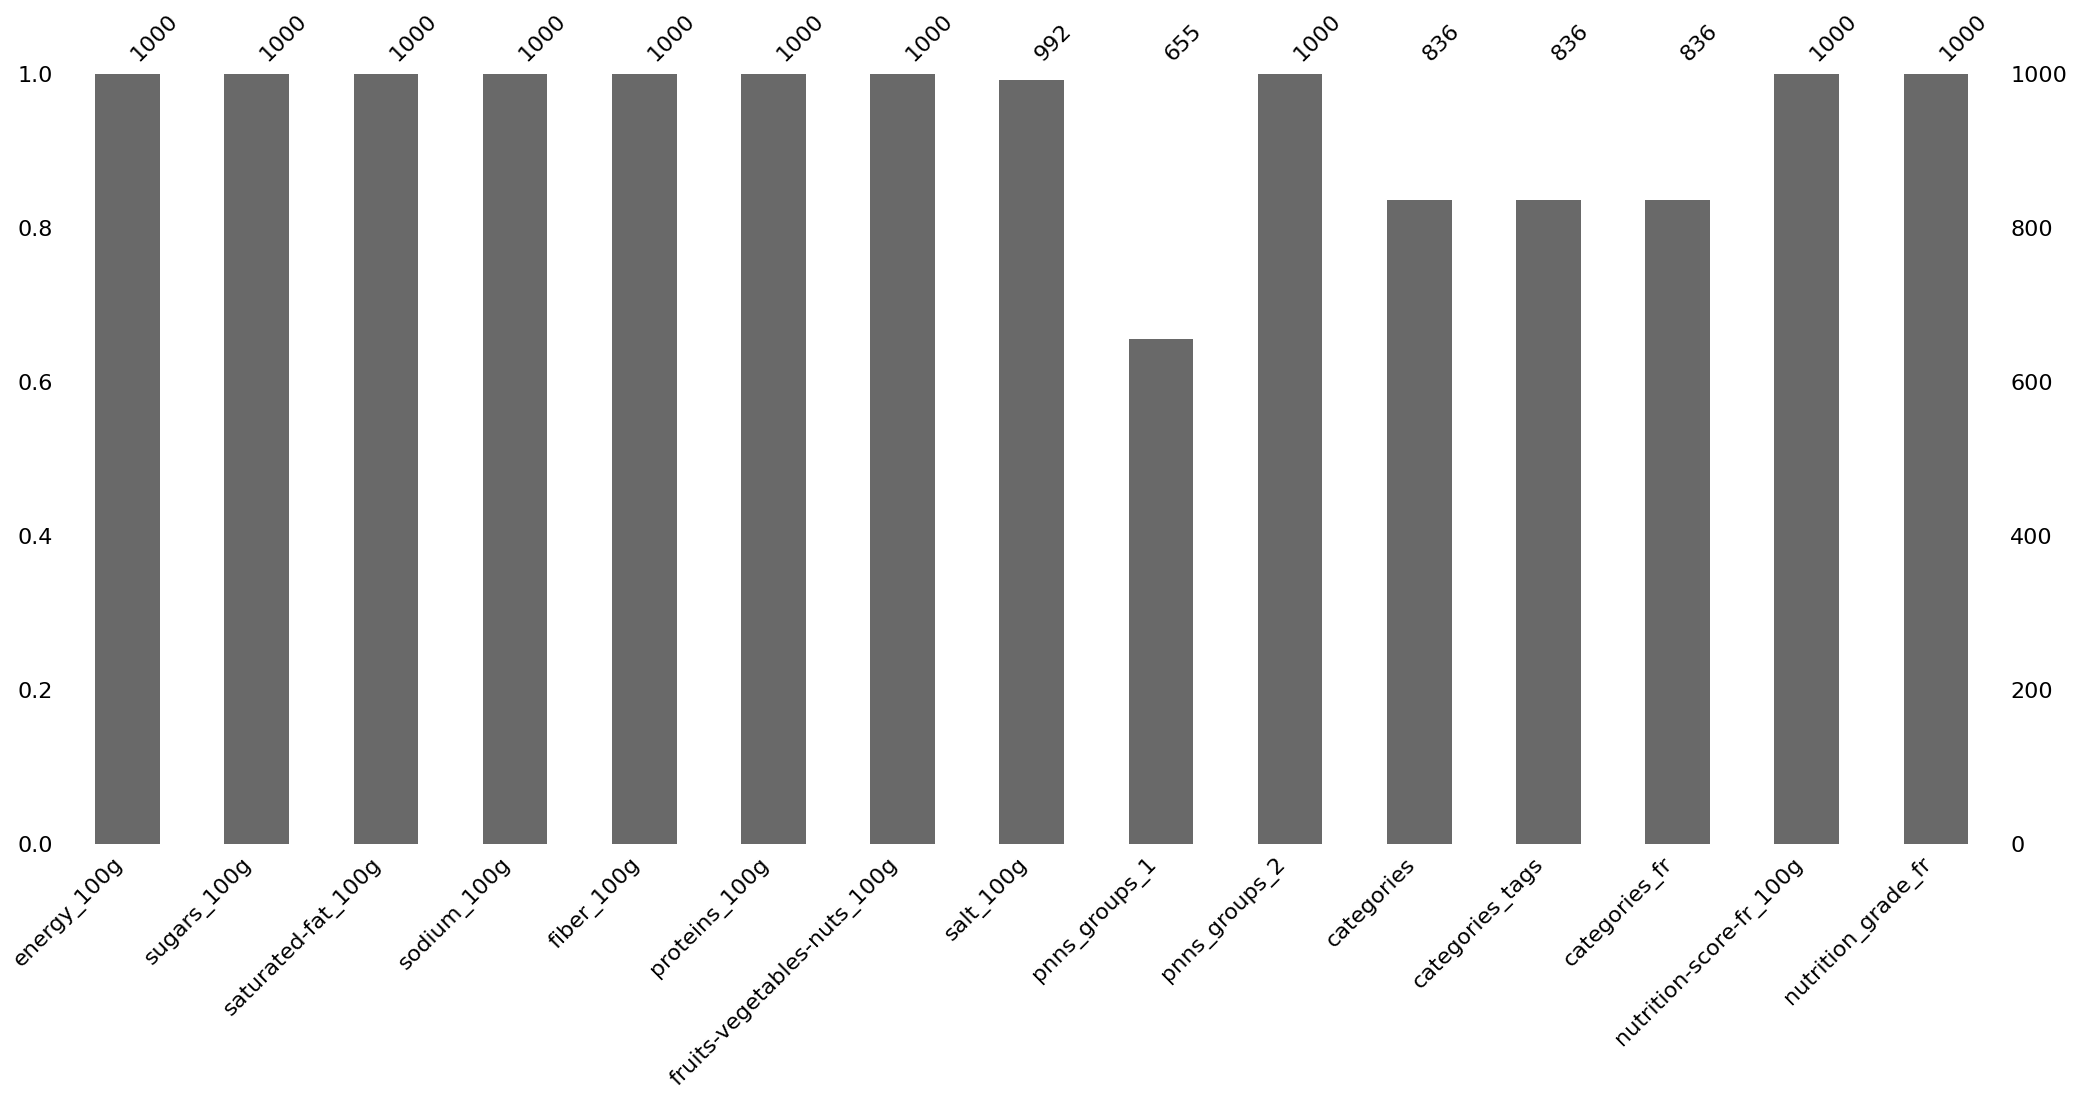

In [33]:
msno.bar(df[columns_to_display].sample(1000))

# <a name="C10">Partie 4 : Analyse uni-variée et bi-variée</a>
## Analyse uni-variée

In [ ]:
df[['nutrition-score-fr_100g', 'nutrition_grade_fr']] = df.apply(
    lambda row: pd.Series(calculer_nutriscore(
        row['energy_100g'], row['saturated-fat_100g'], row['sugars_100g'], row['sodium_100g'],
        row['fruits-vegetables-nuts_100g'], row['fiber_100g'], row['proteins_100g'], row['pnns_groups_1']
    )),
    axis=1
)

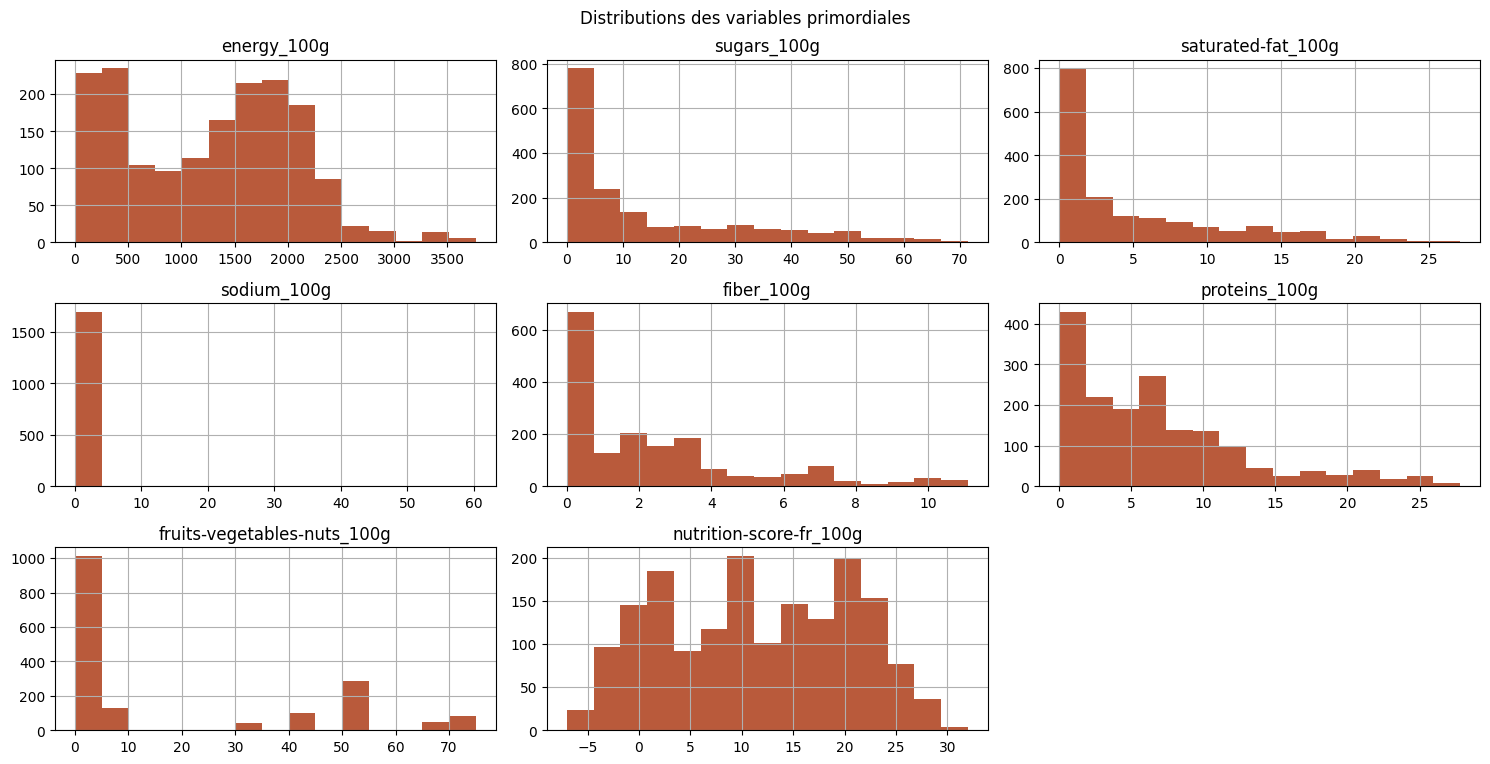

energy_100g  sugars_100g  saturated-fat_100g  sodium_100g   fiber_100g  \
count  1708.000000  1708.000000         1708.000000  1708.000000  1708.000000   
mean   1271.264005    14.100341            4.971922     0.561589     2.347119   
std     798.672616    16.903215            6.095681     2.451058     2.675362   
min       0.000000     0.000000            0.000000     0.000000     0.000000   
25%     454.000000     1.975000            0.000000     0.050000     0.000000   
50%    1450.000000     6.000000            2.200000     0.268500     1.700000   
75%    1896.250000    23.300000            8.000000     0.571000     3.570000   
max    3766.000000    71.430000           27.100000    60.300000    11.100000   

       proteins_100g  fruits-vegetables-nuts_100g  nutrition-score-fr_100g  
count    1708.000000                  1708.000000              1708.000000  
mean        6.770216                    18.132670                11.365340  
std         6.184208                    24.732905                 8.977418  
min         0.000000                     0.000000                -7.000000  
25%         1.815000                     0.000000                 3.000000  
50%         5.700000                     2.950000                11.000000  
75%         9.620000                    40.000000                19.000000  
max        27.800000                    75.000000                32.000000

In [51]:
# Filtrer les données pour ne garder que les colonnes d'intérêt
filtered_data = df[columns_of_interest]

# Calculer les statistiques descriptives
descriptive_stats = filtered_data.describe()

# Visualiser les distributions avec des histogrammes
filtered_data.hist(bins=15, figsize=(15, 10), layout=(4, 3), color=fruit_color)
plt.suptitle('Distributions des variables primordiales')
plt.tight_layout()
plt.show()

descriptive_stats

Voici les statistiques descriptives et les distributions des variables primordiales :

**energy_100g :**
- Moyenne : 1271.26 kJ
- Écart-type : 798.67 kJ
- Distribution : Assez étalée, avec une concentration autour de 1500 kJ.

**sugars_100g :**
- Moyenne : 14.10 g
- Écart-type : 16.90 g
- Distribution : Majoritairement concentrée autour de 0-10 g, avec quelques valeurs élevées.

**saturated-fat_100g :**

- Moyenne : 4.97 g
- Écart-type : 6.09 g
- Distribution : Forte concentration autour de 0 g, avec une longue traîne vers des valeurs plus élevées.

**sodium_100g :**

- Moyenne : 0.46 g
- Écart-type : 1.23 g 
- Distribution : Très concentrée autour de 0 g, avec quelques valeurs élevées.

**fiber_100g :**

- Moyenne : 2.34 g
- Écart-type : 2.67 g
- Distribution : Concentrée autour de 0-2 g, avec une traîne vers des valeurs plus élevées.

**proteins_100g :**

- Moyenne : 6.77 g
- Écart-type : 6.18 g
- Distribution : Concentrée autour de 0-10 g, avec une traîne vers des valeurs plus élevées.

**fruits-vegetables-nuts_100g :**

- Moyenne : 18.13 %
- Écart-type : 24.73 %
- Distribution : Très étalée, avec des valeurs allant de 0 à 100 %.

**nutrition-score-fr_100g :**

- Moyenne : 11.36
- Écart-type : 8.97
- Distribution : Étalée, avec une concentration autour de 10-20.

## Analyse bi-variée

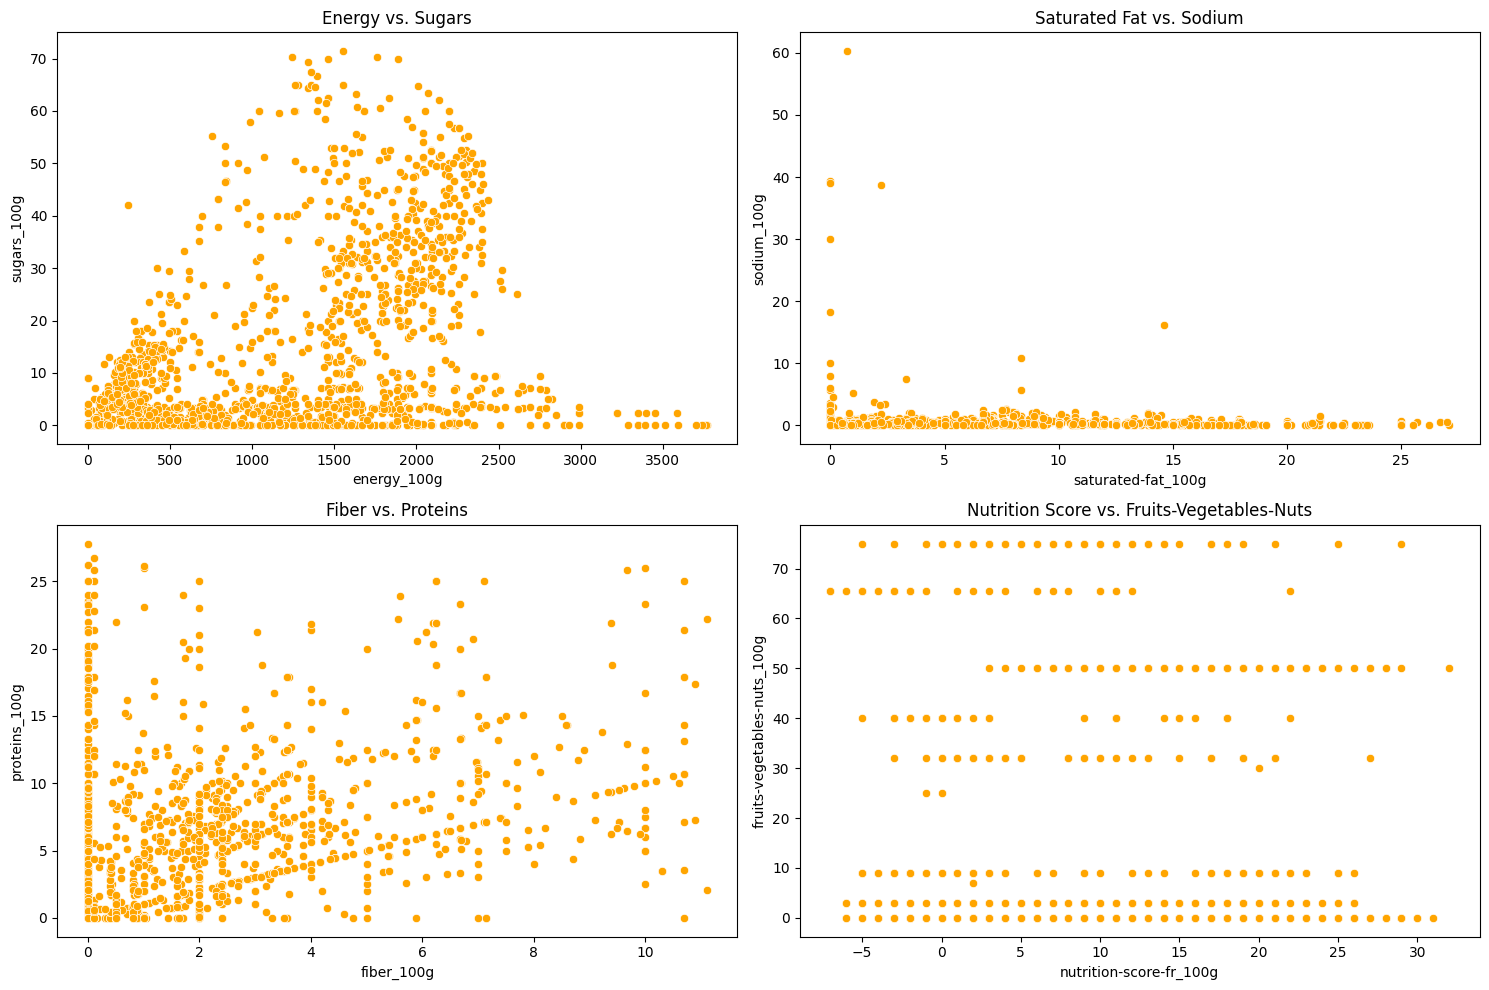

In [ ]:
# Tracer les relations bivariées
plt.figure(figsize=(15, 10))
# Créer une palette personnalisée avec des teintes d'orange
orange_palette = sns.color_palette([fruit_color, "#FFA500", "#FF8C00", "#FF7F50", "#FF6347"])
sns.set_palette(orange_palette)

# energy_100g vs. sugars_100g
plt.subplot(2, 2, 1)
sns.scatterplot(x='energy_100g', y='sugars_100g', data=df[columns_to_display])
plt.title('Energy vs. Sugars')

# saturated-fat_100g vs. sodium_100g
plt.subplot(2, 2, 2)
sns.scatterplot(x='saturated-fat_100g', y='sodium_100g', data=df[columns_to_display])
plt.title('Saturated Fat vs. Sodium')

# fiber_100g vs. proteins_100g
plt.subplot(2, 2, 3)
sns.scatterplot(x='fiber_100g', y='proteins_100g', data=df[columns_to_display])
plt.title('Fiber vs. Proteins')

# nutrition-score-fr_100g vs. fruits-vegetables-nuts_100g
plt.subplot(2, 2, 4)
sns.scatterplot(x='nutrition-score-fr_100g', y='fruits-vegetables-nuts_100g', data=df[columns_to_display])
plt.title('Nutrition Score vs. Fruits-Vegetables-Nuts')

plt.tight_layout()
plt.show()


Les graphiques de dispersion montrent les relations entre différentes paires de variables :

- **Énergie vs. Sucres** : Il semble y avoir une légère corrélation positive, indiquant que les produits avec plus d'énergie ont tendance à avoir plus de sucres.
- **Graisses saturées vs. Sodium** : La relation n'est pas claire, mais il y a une dispersion importante.
- **Fibres vs. Protéines** : Il y a une légère corrélation positive, suggérant que les produits riches en fibres ont tendance à être riches en protéines.
- **Score nutritionnel vs. Fruits, légumes, noix** : Il y a une corrélation négative, indiquant que les produits avec un score nutritionnel plus élevé ont tendance à avoir moins de fruits, légumes et noix.

In [39]:
df.to_csv("./data/product_cleaned2.csv")

In [40]:
df.shape

(1708, 70)

# <a name="C15">Partie 5 : Analyse multivariée</a>
## Analyse ACP

<Axes: >

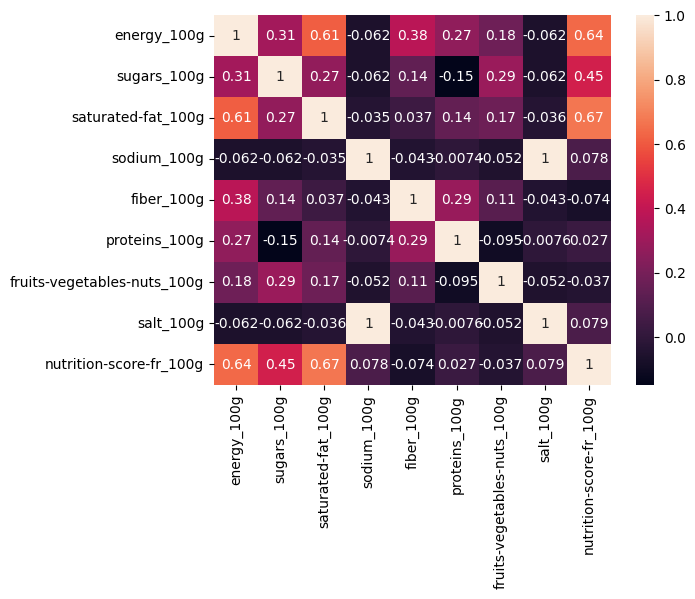

In [47]:
numeric_df = df[columns_to_display].select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True)

La matrice de corrélation montre les relations linéaires entre les variables numériques de votre ensemble de données. Voici quelques observations :

- **Énergie (energy_100g) :**

    - Corrélation positive modérée avec les sucres (sugars_100g) et les graisses saturées (saturated-fat_100g), ce qui est attendu car ces nutriments contribuent à l'énergie totale.

- **Sucres (sugars_100g) :**

    - Corrélation négative modérée avec le score nutritionnel (nutrition-score-fr_100g), indiquant que les produits avec plus de sucres ont tendance à avoir un score nutritionnel plus élevé (moins bon).

- **Graisses saturées (saturated-fat_100g) :**

    - Corrélation positive modérée avec l'énergie, mais faible avec les autres variables.

- **Fibres (fiber_100g) :**

    - Corrélation positive modérée avec les protéines (proteins_100g), ce qui est cohérent car les aliments riches en fibres sont souvent riches en protéines.

- **Score Nutritionnel (nutrition-score-fr_100g) :**

    - Corrélation négative avec les fruits, légumes et noix (fruits-vegetables-nuts_100g), confirmant que les produits avec plus de ces ingrédients ont un meilleur score nutritionnel.

In [37]:
# Imputation des valeurs manquantes avec la moyenne
imputer = SimpleImputer(strategy='median')
df_imputed = imputer.fit_transform(numeric_df)

# Standardisation des données
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_imputed)

# Application de l'ACP
pca = PCA(n_components=1)
principal_component = pca.fit_transform(df_standardized)

# Ajout de la composante principale au DataFrame
df_cleaned = pd.DataFrame(df_imputed, columns=numeric_df.columns)
df_cleaned['principal_component'] = principal_component

# Visualisation des poids des variables sur la composante principale
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(loadings, columns=['PC1'], index=numeric_df.columns)

print("Poids des variables sur la composante principale :\n", loading_df)

Poids des variables sur la composante principale :
                                   PC1
energy_100g                  0.869107
sugars_100g                  0.585030
saturated-fat_100g           0.808587
sodium_100g                 -0.133702
fiber_100g                   0.296828
proteins_100g                0.209074
fruits-vegetables-nuts_100g  0.281155
salt_100g                   -0.133918
nutrition-score-fr_100g      0.800042


Poids des variables sur les composantes principales :
                                   PC1       PC2       PC3       PC4       PC5
energy_100g                  0.869107  0.045854  0.230115 -0.017276 -0.001932
sugars_100g                  0.585030 -0.010063 -0.399716  0.354601 -0.412762
saturated-fat_100g           0.808587  0.101344 -0.073668 -0.241737  0.294330
sodium_100g                 -0.133702  0.982628  0.043543  0.121777  0.005925
fiber_100g                   0.296828 -0.091356  0.640533  0.508497 -0.370187
proteins_100g                0.209074  0.003157  0.803533 -0.153780  0.240488
fruits-vegetables-nuts_100g  0.281155 -0.097603 -0.230189  0.741292  0.542347
salt_100g                   -0.133918  0.982552  0.043507  0.122149  0.005788
nutrition-score-fr_100g      0.800042  0.251173 -0.235415 -0.364401 -0.107680


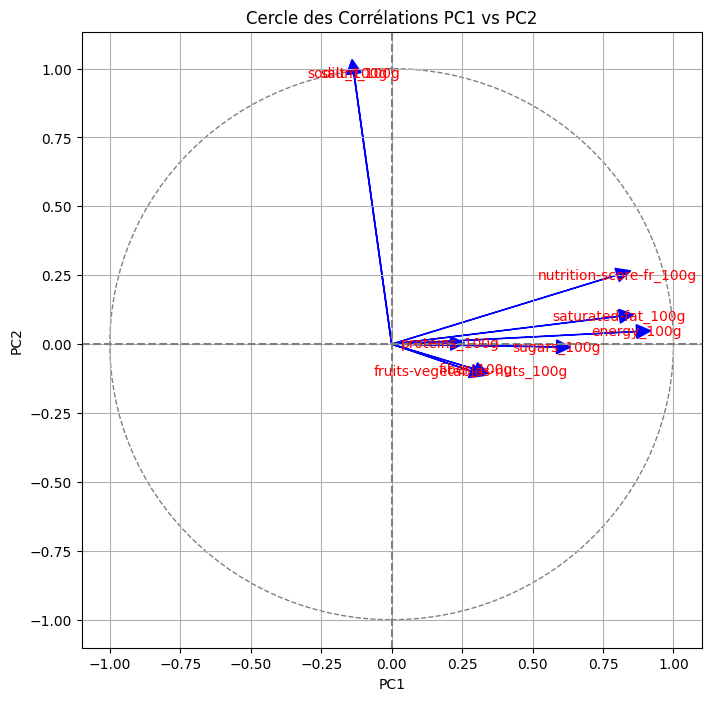

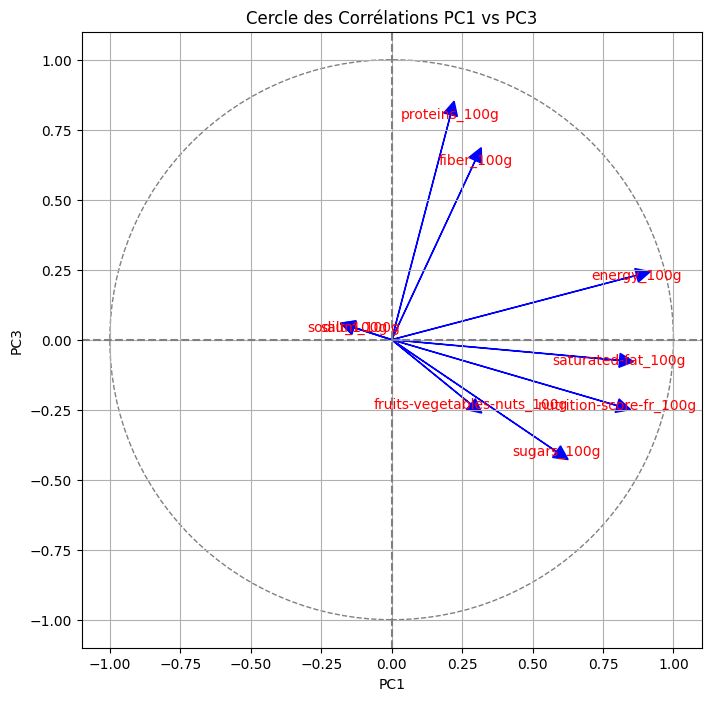

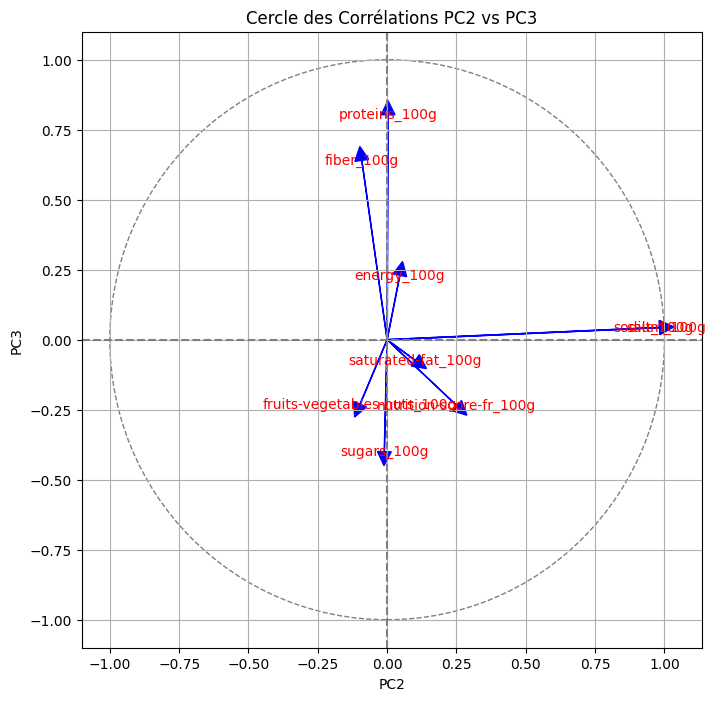

In [38]:
# Imputation des valeurs manquantes avec la médiane
imputer = SimpleImputer(strategy='median')
df_imputed = imputer.fit_transform(numeric_df)

# Standardisation des données
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_imputed)

# Application de l'ACP avec 3 composantes
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df_standardized)

# Ajout des composantes principales au DataFrame
df_cleaned = pd.DataFrame(df_imputed, columns=numeric_df.columns)
for i in range(principal_components.shape[1]):
    df_cleaned[f'PC{i+1}'] = principal_components[:, i]

# Visualisation des poids des variables sur les composantes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=numeric_df.columns)

print("Poids des variables sur les composantes principales :\n", loading_df)

# Calcul des poids (loadings)
# loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Fonction pour tracer le cercle des corrélations
def plot_correlation_circle(loadings, pc1, pc2, title):
    plt.figure(figsize=(8, 8))
    circle = plt.Circle((0, 0), radius=1, color='grey', fill=False, linestyle='--')
    plt.gca().add_patch(circle)
    plt.axhline(0, color='grey', linestyle='--')
    plt.axvline(0, color='grey', linestyle='--')

    for i, (x, y) in enumerate(zip(loadings[:, pc1], loadings[:, pc2])):
        plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, color='blue')
        plt.text(x, y, numeric_df.columns[i], color='red', ha='center', va='center')

    plt.xlabel(f'PC{pc1+1}')
    plt.ylabel(f'PC{pc2+1}')
    plt.title(title)
    plt.grid()
    plt.show()

# Tracer les cercles des corrélations pour différentes paires de composantes
plot_correlation_circle(loadings, 0, 1, 'Cercle des Corrélations PC1 vs PC2')
plot_correlation_circle(loadings, 0, 2, 'Cercle des Corrélations PC1 vs PC3')
plot_correlation_circle(loadings, 1, 2, 'Cercle des Corrélations PC2 vs PC3')
# Ajoutez d'autres paires si nécessaire

Le graphique montre les charges des variables sur les deux premières composantes principales (PC1 et PC2). Voici comment l'interpréter :

**Axes :**

L'axe horizontal (PC1) représente la première composante principale.
L'axe vertical (PC2) représente la deuxième composante principale.
**Flèches :**

Chaque flèche représente une variable.
La direction et la longueur de la flèche indiquent comment et dans quelle mesure la variable contribue aux composantes principales.

**Interprétation :**

Les variables comme proteins_100g et fiber_100g ont des charges élevées sur PC2, indiquant qu'elles contribuent fortement à cette composante.
sugars_100g a une charge négative sur PC2, ce qui signifie qu'elle est inversement corrélée avec cette composante.
nutrition-score-fr_100g et energy_100g contribuent principalement à PC1.

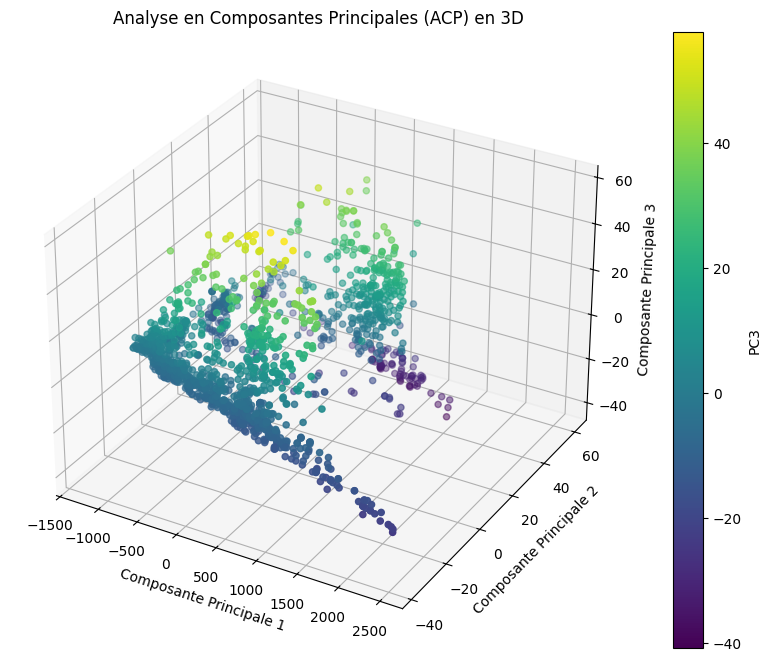

array([9.98423065e+01, 9.73926139e-02, 3.80242358e-02])

In [39]:
# Appliquer l'ACP avec 3 composantes principales
pca_3 = PCA(n_components=3)
principal_components_3 = pca_3.fit_transform(df_imputed)

# Créer un DataFrame avec les composantes principales
pca_df_3 = pd.DataFrame(data=principal_components_3, columns=['PC1', 'PC2', 'PC3'])

# Visualiser les composantes principales en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df_3['PC1'], pca_df_3['PC2'], pca_df_3['PC3'], c=pca_df_3['PC3'], cmap='viridis')

# Ajouter des labels et un titre
ax.set_title('Analyse en Composantes Principales (ACP) en 3D')
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')
plt.colorbar(scatter, label='PC3')
plt.show()

# Variance expliquée par chaque composante principale
explained_variance_3 = pca_3.explained_variance_ratio_ * 100
explained_variance_3

Les trois composantes principales représentent ensemble une grande partie de la variance totale des données. PC1, PC2, et PC3 capturent chacune une partie de cette variance, avec PC1 expliquant la plus grande part.

## Analyse ANOVA

In [40]:
from scipy.stats import f_oneway

# ANOVA pour 'nutrition-score-fr_100g'
grouped_nutrition = [group['nutrition-score-fr_100g'].dropna() for name, group in df.groupby('pnns_groups_1')]
anova_nutrition = f_oneway(*grouped_nutrition)

# ANOVA pour 'saturated-fat_100g'
grouped_saturated_fat = [group['saturated-fat_100g'].dropna() for name, group in df.groupby('pnns_groups_1')]
anova_saturated_fat = f_oneway(*grouped_saturated_fat)

# Afficher les résultats
print("ANOVA pour 'nutrition-score-fr_100g' :", anova_nutrition)
print("ANOVA pour 'saturated-fat_100g' :", anova_saturated_fat)

ANOVA pour 'nutrition-score-fr_100g' : F_onewayResult(statistic=np.float64(91.97400012739526), pvalue=np.float64(1.1063136375029519e-117))
ANOVA pour 'saturated-fat_100g' : F_onewayResult(statistic=np.float64(57.51542855742546), pvalue=np.float64(9.244621943205934e-79))


In [41]:

# Diviser les données en groupes
groups = [group['nutrition-score-fr_100g'].dropna() for name, group in df.groupby('pnns_groups_1')]

# Appliquer l'ANOVA
anova_result = f_oneway(*groups)

# Afficher les résultats
print("Statistique F:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

# Interprétation
if anova_result.pvalue < 0.05:
    print("Les différences entre les groupes sont statistiquement significatives.")
else:
    print("Les différences entre les groupes ne sont pas statistiquement significatives.")

Statistique F: 91.97400012739526
p-value: 1.1063136375029519e-117
Les différences entre les groupes sont statistiquement significatives.


In [42]:
# Diviser les données en groupes pour 'saturated-fat_100g'
groups = [group['saturated-fat_100g'].dropna() for name, group in df.groupby('pnns_groups_1')]

# Appliquer l'ANOVA
anova_result = f_oneway(*groups)

# Afficher les résultats
print("Statistique F pour saturated-fat_100g:", anova_result.statistic)
print("p-value pour saturated-fat_100g:", anova_result.pvalue)

# Interprétation
if anova_result.pvalue < 0.05:
    print("Les différences entre les groupes pour saturated-fat_100g sont statistiquement significatives.")
else:
    print("Les différences entre les groupes pour saturated-fat_100g ne sont pas statistiquement significatives.")


Statistique F pour saturated-fat_100g: 57.51542855742546
p-value pour saturated-fat_100g: 9.244621943205934e-79
Les différences entre les groupes pour saturated-fat_100g sont statistiquement significatives.


In [43]:
# Diviser les données en groupes pour 'saturated-fat_100g'
groups = [group['saturated-fat_100g'].dropna() for name, group in df.groupby('nutrition_grade_fr')]

# Appliquer l'ANOVA
anova_result = f_oneway(*groups)

# Afficher les résultats
print("Statistique F pour saturated-fat_100g:", anova_result.statistic)
print("p-value pour saturated-fat_100g:", anova_result.pvalue)

# Interprétation
if anova_result.pvalue < 0.05:
    print("Les différences entre les groupes pour saturated-fat_100g sont statistiquement significatives.")
else:
    print("Les différences entre les groupes pour saturated-fat_100g ne sont pas statistiquement significatives.")


Statistique F pour saturated-fat_100g: 390.0177375369514
p-value pour saturated-fat_100g: 1.3710761038947905e-238
Les différences entre les groupes pour saturated-fat_100g sont statistiquement significatives.


In [44]:
# Diviser les données en groupes pour 'saturated-fat_100g'
groups = [group['nutrition-score-fr_100g'].dropna() for name, group in df.groupby('nutrition_grade_fr')]

# Appliquer l'ANOVA
anova_result = f_oneway(*groups)

# Afficher les résultats
print("Statistique F pour saturated-fat_100g:", anova_result.statistic)
print("p-value pour saturated-fat_100g:", anova_result.pvalue)

# Interprétation
if anova_result.pvalue < 0.05:
    print("Les différences entre les groupes pour saturated-fat_100g sont statistiquement significatives.")
else:
    print("Les différences entre les groupes pour saturated-fat_100g ne sont pas statistiquement significatives.")


Statistique F pour saturated-fat_100g: 6300.60539294224
p-value pour saturated-fat_100g: 0.0
Les différences entre les groupes pour saturated-fat_100g sont statistiquement significatives.


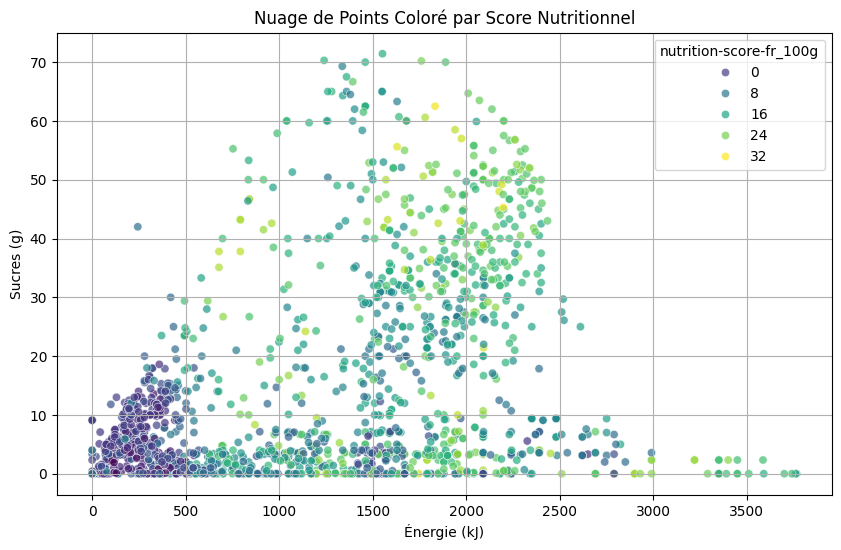

In [45]:
# Créer un graphique en nuage de points colorés
# Sélectionner les colonnes primordiales
columns_of_interest = [
    'energy_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g',
    'fiber_100g', 'proteins_100g', 'fruits-vegetables-nuts_100g',
    'pnns_groups_1', 'pnns_groups_2', 'nutrition-score-fr_100g',
    'nutrition_grade_fr'
]

# Filtrer les données pour ne garder que les colonnes d'intérêt
filtered_data = df[columns_of_interest]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data,
    x='energy_100g',
    y='sugars_100g',
    hue='nutrition-score-fr_100g',
    palette='viridis',
    alpha=0.7
)

plt.title('Nuage de Points Coloré par Score Nutritionnel')
plt.xlabel('Énergie (kJ)')
plt.ylabel('Sucres (g)')
plt.grid(True)
plt.show()

Le graphique ci-dessus montre la relation entre l'énergie (en kJ) et les sucres (en g) pour chaque produit, coloré par le score nutritionnel (nutrition-score-fr_100g). 

**Axes :**

Énergie (kJ) : Représentée sur l'axe horizontal.
Sucres (g) : Représentée sur l'axe vertical.


**Couleurs :**

Les points sont colorés en fonction du score nutritionnel. Les couleurs varient du violet (faible score nutritionnel, meilleure qualité) au jaune (score nutritionnel élevé, moins bonne qualité).

**Interprétation :**

Les produits avec une haute teneur en énergie et en sucres tendent à avoir des scores nutritionnels plus élevés (couleurs plus jaunes), indiquant une qualité nutritionnelle moindre.
Les produits avec des niveaux plus bas d'énergie et de sucres ont tendance à avoir des scores nutritionnels plus faibles (couleurs plus violettes), indiquant une meilleure qualité nutritionnelle.

# Partie 6 : Synthèse et perspectives

### Relations entre Variables :

- **Corrélation Négative :** Une corrélation négative a été observée entre le score nutritionnel et la teneur en fruits, légumes, et noix. Cela signifie que les produits riches en ces ingrédients ont tendance à avoir un meilleur score nutritionnel.
- **Énergie et Sucres :** Les produits avec une haute teneur en énergie et en sucres tendent à avoir des scores nutritionnels plus élevés (moins bons), indiquant une qualité nutritionnelle moindre.

### Analyse en Composantes Principales (ACP) :

- **PC1 :** La première composante principale (PC1) capture principalement les variations liées au score nutritionnel, à l'énergie, aux graisses saturées, et aux sucres. Cela suggère que ces variables sont cruciales pour déterminer la qualité nutritionnelle globale des produits.
- **PC2 :** La deuxième composante principale (PC2) met en avant l'importance des protéines et des fibres, qui sont souvent associées à des produits plus sains.

### Analyse de la Variance (ANOVA) :

- **Différences Significatives :** L'ANOVA a révélé des différences statistiquement significatives entre les scores nutritionnels moyens des différents groupes de produits. Cela indique que le type de produit influence fortement le score nutritionnel.
- **Implications :** Les résultats suggèrent que certains types de produits pourraient nécessiter des améliorations spécifiques pour augmenter leur qualité nutritionnelle.

### Visualisations :

- ** Nuage de Points Colorés :** Les graphiques en nuage de points ont montré des relations claires entre l'énergie, les sucres, et le score nutritionnel. Les produits avec des scores nutritionnels plus élevés tendent à avoir des niveaux plus élevés d'énergie et de sucres.
- **Charges des Variables :** Les visualisations des charges des variables sur les composantes principales ont aidé à identifier les variables les plus influentes dans chaque composante.